**IMPORTING DRIVE**

In [ ]:
#Import python packages
#from google.collab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics #for accuracy
from sklearn import tree


**READ TRAINING DATA**

In [ ]:
trainfile = r'/gdrive/My Drive/Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)
trainData.head()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


**READ TEST DATA**


In [ ]:
testfile = r'/gdrive/My Drive/Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


**DATA SHAPE**

In [ ]:
print(trainData.shape)     
print(testData.shape)

(76020, 371)
(75818, 370)


**COLUMN INFORMATION**

In [ ]:
trainData.info()
print()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


**CHECKING NUMBER OF NULL VALUES**

In [ ]:
trainData.isna().sum().sort_values(ascending=False)

ID                         0
imp_trasp_var17_in_ult1    0
ind_var7_emit_ult1         0
imp_venta_var44_ult1       0
imp_venta_var44_hace3      0
                          ..
num_op_var40_hace3         0
num_op_var40_hace2         0
num_var25                  0
num_var25_0                0
TARGET                     0
Length: 371, dtype: int64

**DATA SET STATISTICS**

In [ ]:
trainData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


**COLUMN NAME LIST**

In [ ]:
TrainCols = list (trainData.columns.values)
TestCols = list (testData.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

**SEPARATE TARGET COLUMN FROM TRAIN DATASET**

In [ ]:
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData.copy()

(76020, 370)
(76020, 1)


**INITIALISING DECISION TREE ALGORITHM**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

**BASIC ANALYSIS**

In [ ]:
print("Count of 0 & 1 in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())

Count of 0 & 1 in TARGET column for Train Data
0    73012
1     3008
Name: TARGET, dtype: int64


**MODEL ACCURACY**

In [ ]:
X_Pred = dt.predict(Xtrain)
print("Accuracy:", metrics.accuracy_score(Ytrain,X_Pred))

Accuracy: 1.0


**DECISION TREE**

[Text(0.522241441753097, 0.9915254237288136, 'X[183] <= 2.955\ngini = 0.076\nsamples = 76020\nvalue = [73012, 3008]'),
 Text(0.2624644392868529, 0.9745762711864406, 'X[2] <= 27.5\ngini = 0.161\nsamples = 21289\nvalue = [19403, 1886]'),
 Text(0.064718629771152, 0.9576271186440678, 'X[369] <= 56607.525\ngini = 0.048\nsamples = 11140\nvalue = [10868, 272]'),
 Text(0.02555891616287036, 0.940677966101695, 'X[2] <= 25.5\ngini = 0.112\nsamples = 1441\nvalue = [1355, 86]'),
 Text(0.014240573843293875, 0.923728813559322, 'X[324] <= 16.5\ngini = 0.085\nsamples = 1220\nvalue = [1166, 54]'),
 Text(0.012870816659484191, 0.9067796610169492, 'X[369] <= 56599.201\ngini = 0.081\nsamples = 1213\nvalue = [1162, 51]'),
 Text(0.012507158024218153, 0.8898305084745762, 'X[369] <= 13147.11\ngini = 0.079\nsamples = 1212\nvalue = [1162, 50]'),
 Text(0.010131302291864826, 0.8728813559322034, 'X[0] <= 82678.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.009767643656598787, 0.8559322033898306, 'gini = 0.0\n

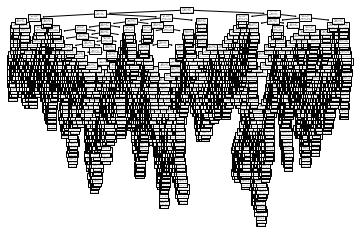

In [ ]:
tree.plot_tree(dt)

**SPLIT TRAIN AND TEST DATASET**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .3)

**MODEL 1**

In [ ]:
dt1 = DecisionTreeClassifier(criterion='gini',splitter='random',class_weight='balanced',max_depth=10,min_samples_leaf=10,min_weight_fraction_leaf=1e-06
)
dt1 = dt1.fit(X_train,Y_train)
Y_Pred = dt1.predict(Xtest)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred_test = dt1.predict(X_test)
print("Accuracy for Model 1:", metrics.accuracy_score(Y_test,Y_Pred_test))

Accuracy for Model 1: 0.7301587301587301


**MODEL 2**

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy',splitter='random',class_weight='balanced',max_depth=10,min_samples_leaf=10,min_weight_fraction_leaf=1e-06
)
dt2 = dt2.fit(X_train,Y_train)
Y_Pred = dt2.predict(Xtest)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred_test = dt2.predict(X_test)
print("Accuracy for Model 2:", metrics.accuracy_score(Y_test,Y_Pred_test))

Accuracy for Model 2: 0.78961676751732


**MODEL 3**

In [ ]:
dt3 = DecisionTreeClassifier(criterion='entropy',splitter='best',class_weight='balanced',max_depth=10,min_samples_leaf=10,min_weight_fraction_leaf=1e-06
)
dt3 = dt3.fit(X_train,Y_train)
Y_Pred = dt3.predict(Xtest)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred_test = dt3.predict(X_test)
print("Accuracy for Model 3:", metrics.accuracy_score(Y_test,Y_Pred_test))

Accuracy for Model 3: 0.7658072437077962


**MODEL 4**

In [ ]:
dt4 = DecisionTreeClassifier(criterion='gini',splitter='best',class_weight='balanced',max_depth=10,min_samples_leaf=10,min_weight_fraction_leaf=1e-06
)
dt4 = dt4.fit(X_train,Y_train)
Y_Pred = dt4.predict(Xtest)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred_test = dt4.predict(X_test)
print("Accuracy for Model 4:", metrics.accuracy_score(Y_test,Y_Pred_test))

Accuracy for Model 4: 0.7655003069367711


**MODEL 5**

In [ ]:
dt5 = DecisionTreeClassifier(criterion='entropy',splitter='random',class_weight='balanced',max_depth=10,min_samples_leaf=10,min_weight_fraction_leaf=1e-06
)
dt5 = dt5.fit(X_train,Y_train)
Y_Pred = dt5.predict(Xtest)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
Y_Pred_test = dt5.predict(X_test)
print("Accuracy for Model 5:", metrics.accuracy_score(Y_test,Y_Pred_test))

Accuracy for Model 5: 0.7855827413838463


**KAGGLE PREDICTION**

In [ ]:
PreID=Xtest['ID']
Y_Pred_prob_test=dt2.predict_proba(Xtest)
Y_Pred_prob_test = pd.DataFrame(Y_Pred_prob_test[:,1],columns=['TARGET'])   
pd.concat([PreID,Y_Pred_prob_test],axis=1).to_csv("/gdrive/My Drive/ResultCIS505.csv",index=False)
